Please upload the dataset file (CSV or ZIP format):


Saving US Airline Flight Routes and Fares 1993-2024.csv to US Airline Flight Routes and Fares 1993-2024.csv
First few rows of the dataset:
       tbl  Year  quarter  citymarketid_1  citymarketid_2  \
0  Table1a  2021        3           30135           33195   
1  Table1a  2021        3           30135           33195   
2  Table1a  2021        3           30140           30194   
3  Table1a  2021        3           30140           30194   
4  Table1a  2021        3           30140           30466   

                            city1                          city2  airportid_1  \
0  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
1  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
2                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
3                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
4                 Albuquerque, NM                    Phoenix, AZ        10140   

   airp

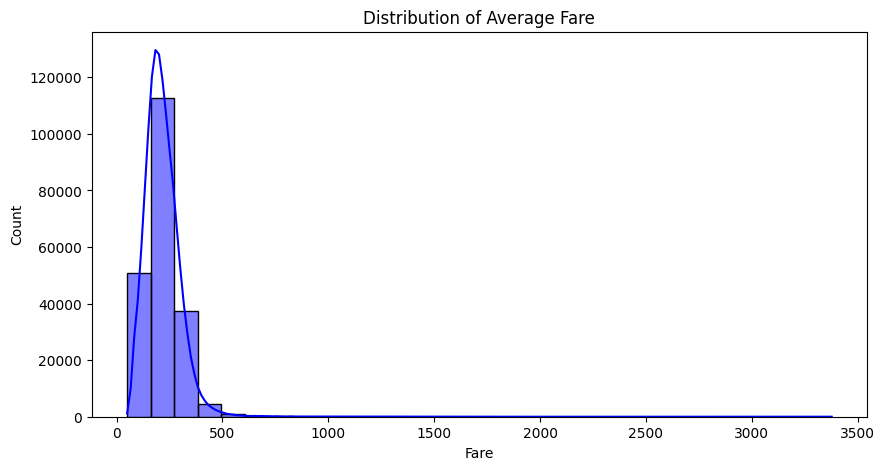

The distribution of average fare shows how fares vary across different routes.


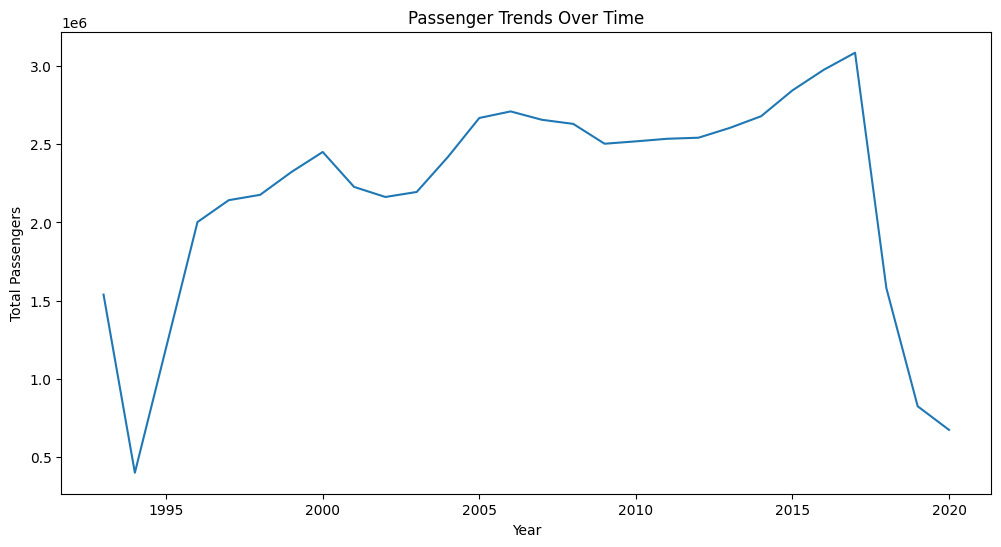

The trend of passenger traffic over the years highlights growth and decline patterns.


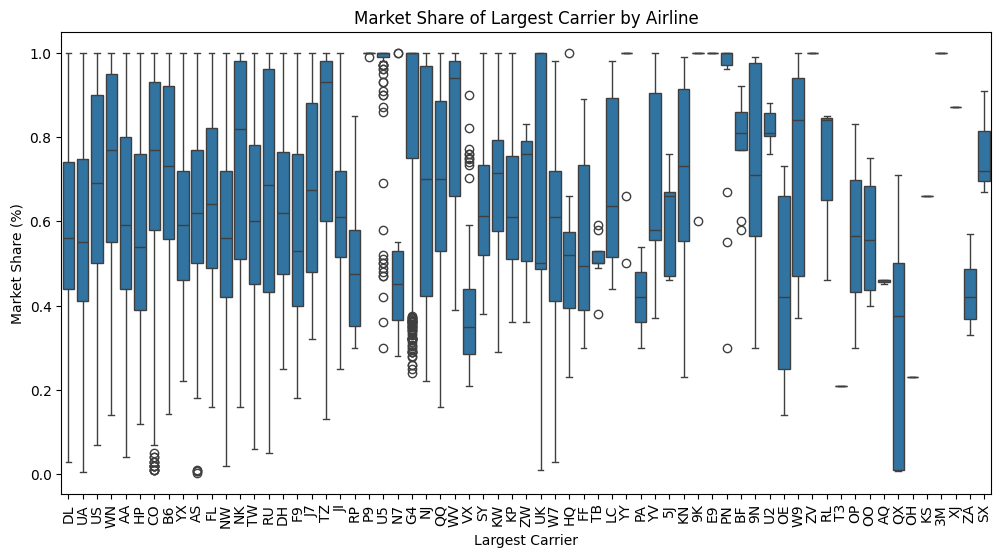

The market share distribution of the largest carrier provides insights into airline dominance.


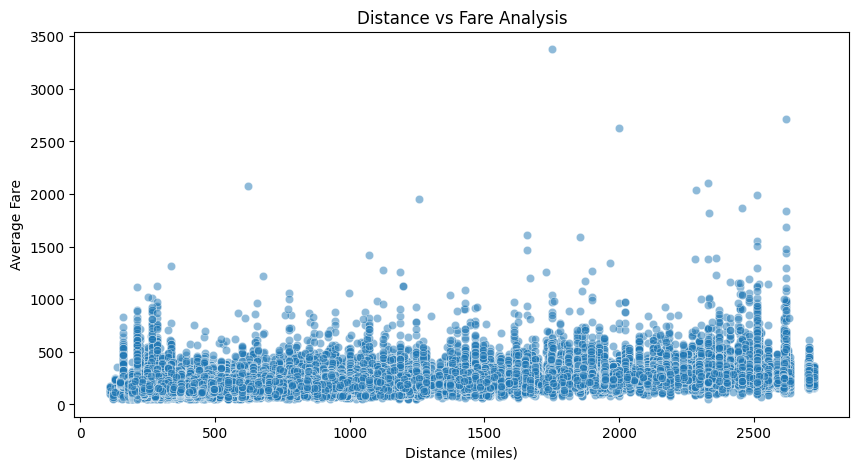

The correlation between distance and fare gives an understanding of pricing trends.


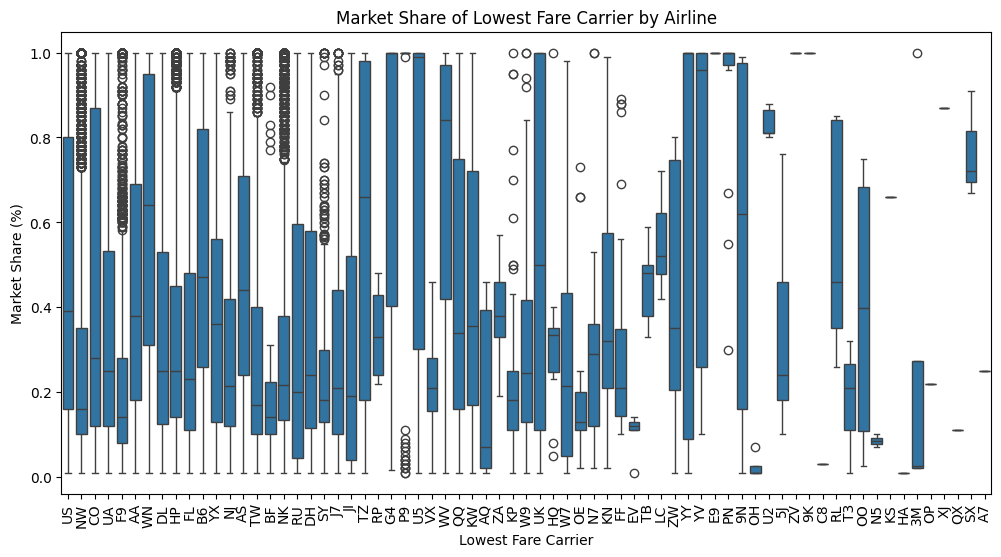

The market share distribution of lowest fare carriers shows budget airline competitiveness.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from google.colab import files
import io
import zipfile
import os

# Step 1: Upload the dataset
print("Please upload the dataset file (CSV or ZIP format):")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Get the file name dynamically

# If a ZIP file is uploaded, extract the first CSV inside
if file_name.endswith('.zip'):
    with zipfile.ZipFile(io.BytesIO(uploaded[file_name]), 'r') as zip_ref:
        zip_ref.extractall("extracted")
        csv_files = [f for f in os.listdir("extracted") if f.endswith(".csv")]
        if csv_files:
            file_name = os.path.join("extracted", csv_files[0])
        else:
            raise FileNotFoundError("No CSV file found in the ZIP archive.")
else:
    file_name = io.BytesIO(uploaded[file_name])

# Attempt to read the file with proper encoding and dtype handling
dtype_mapping = {"Geocoded_City1": str, "Geocoded_City2": str}  # Ensure these columns are read as strings
try:
    df = pd.read_csv(file_name, encoding='utf-8', low_memory=False, dtype=dtype_mapping)
except UnicodeDecodeError:
    df = pd.read_csv(file_name, encoding='ISO-8859-1', low_memory=False, dtype=dtype_mapping)

# Step 2: Display first few rows to understand the data
print("First few rows of the dataset:")
print(df.head())

# Step 3: Data Cleaning
# Convert 'Year' to integer (if not already)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
# Convert 'quarter' to categorical
df['quarter'] = df['quarter'].astype('category')
# Ensure 'Geocoded_City1' and 'Geocoded_City2' contain valid coordinates
df = df.dropna(subset=['Geocoded_City1', 'Geocoded_City2'])

# Step 4: Geospatial Analysis
print("Generating Geospatial Analysis Map...")
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
marker_cluster = MarkerCluster().add_to(us_map)

for _, row in df.iterrows():
    try:
        lat1, lon1 = map(float, row['Geocoded_City1'].split(','))
        lat2, lon2 = map(float, row['Geocoded_City2'].split(','))
        folium.Marker([lat1, lon1], popup=row['city1']).add_to(marker_cluster)
        folium.Marker([lat2, lon2], popup=row['city2']).add_to(marker_cluster)
    except (ValueError, AttributeError):
        continue  # Skip entries with incorrect formatting

us_map.save("us_airline_routes_map.html")
print("Geospatial Analysis Map saved as 'us_airline_routes_map.html'")

# Step 5: Statistical Analysis & Visualizations
print("Generating Statistical Analysis and Graphs...")

# Distribution of average fare
plt.figure(figsize=(10, 5))
sns.histplot(df['fare'], bins=30, kde=True, color='blue')
plt.title("Distribution of Average Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()
print("The distribution of average fare shows how fares vary across different routes.")

# Passenger trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='passengers', estimator='sum', errorbar=None)
plt.title("Passenger Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.show()
print("The trend of passenger traffic over the years highlights growth and decline patterns.")

# Market share of the largest carrier
plt.figure(figsize=(12, 6))
sns.boxplot(x='carrier_lg', y='large_ms', data=df)
plt.xticks(rotation=90)
plt.title("Market Share of Largest Carrier by Airline")
plt.xlabel("Largest Carrier")
plt.ylabel("Market Share (%)")
plt.show()
print("The market share distribution of the largest carrier provides insights into airline dominance.")

# Distance vs Fare Analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='nsmiles', y='fare', alpha=0.5)
plt.title("Distance vs Fare Analysis")
plt.xlabel("Distance (miles)")
plt.ylabel("Average Fare")
plt.show()
print("The correlation between distance and fare gives an understanding of pricing trends.")

# Lowest Fare Market Share by Airline
plt.figure(figsize=(12, 6))
sns.boxplot(x='carrier_low', y='lf_ms', data=df)
plt.xticks(rotation=90)
plt.title("Market Share of Lowest Fare Carrier by Airline")
plt.xlabel("Lowest Fare Carrier")
plt.ylabel("Market Share (%)")
plt.show()
print("The market share distribution of lowest fare carriers shows budget airline competitiveness.")